# Project: The TMBD Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose to investigate the TMBD movie database available at https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> I will investigate the work of the directors, which directors created how many movies, which directors' movies were the most popular, and if a popular movie generated high revenue?

In [5]:
# import packages of numpy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [6]:
#read the file
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
# get the description of columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

In [8]:
# check the structure of the data and if any problems that need to be cleaned
df.info()

# necessary data is in int or float format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [13]:
# check if there is any duplicate data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10822, dtype: bool

In [14]:
# drop rows where the 'director' is missing which is useful for further investigation with the director's success or revenue
df.dropna(subset=['director'], inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [15]:
# drop columns that will be not used for analysis
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10822 non-null float64
budget            10822 non-null int64
revenue           10822 non-null int64
original_title    10822 non-null object
director          10822 non-null object
runtime           10822 non-null int64
genres            10801 non-null object
release_date      10822 non-null object
vote_count        10822 non-null int64
vote_average      10822 non-null float64
release_year      10822 non-null int64
budget_adj        10822 non-null float64
revenue_adj       10822 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA0CA88>,
      dtype=object)

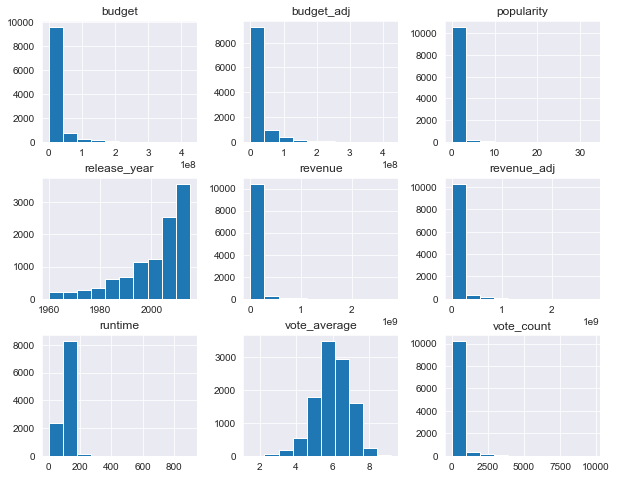

In [16]:
df.hist(figsize=(10,8))

## <a id='eda'></a>
## Exploratory Data Analysis

### Research Area 1: Directors
> Question 1: Which directors directed the most movies?

In [ ]:
# get the most prolific directors
df['director'].unique()
pro_dir=df.director.value_counts().head(10).plot(kind='bar')
plt.legend()
plt.ylabel('Number of Movies')
plt.xlabel('Name of Director')
plt.title('Most Active Directors')


In [ ]:
# median value for created films per a director
pro_dir.median()

In [ ]:
# mean value for created films per a director
pro_dir.mean()

> Question 2: Which directors' which movies were the most popular?

In [73]:
# check which directors' which movies were the most popular and check if the number of votes is not too low
dir_vote_movie = df.groupby(['director','original_title', 'vote_count']).vote_average.mean()
dir_vote_movie.sort_values(ascending=False).head(10)

director                              original_title                                                   vote_count
Mark Cousins                          The Story of Film: An Odyssey                                    14            9.2
Jennifer Siebel Newsom                The Mask You Live In                                             11            8.9
Carl Tibbetts                         Black Mirror: White Christmas                                    41            8.8
Derek Frankowski                      Life Cycles                                                      27            8.8
David Mallet                          Pink Floyd: Pulse                                                23            8.7
James Payne                           Doctor Who: The Time of the Doctor                               26            8.5
Curt Morgan                           The Art of Flight                                                60            8.5
Martin Scorsese|Michael Henry Wilson  A

> Question 3: Which directors' were the most popular in general?

In [60]:
# check which directors' were the most popular in general
dir_vote = df.groupby(['director', 'vote_count']).vote_average.mean()
dir_vote.sort_values(ascending=False).head(10)

director                              vote_count
Mark Cousins                          14            9.2
Jennifer Siebel Newsom                11            8.9
Carl Tibbetts                         41            8.8
Derek Frankowski                      27            8.8
David Mallet                          23            8.7
Saul Swimmer                          14            8.5
Martin Scorsese|Michael Henry Wilson  11            8.5
Curt Morgan                           60            8.5
Stan Lathan                           17            8.5
James Payne                           26            8.5
Name: vote_average, dtype: float64

### Research Area 2: Budget and Revenue of Popular Movies
> Based on the database, only 25% of the movies received 6.6 or higher votes out of a 10-scale ranking so these can be considered popular, while the rest 75% not so popular.

> Question 1: What is the budget distribution of all movies?

Text(0.5, 1.0, 'Budget Distributation of All Movies')

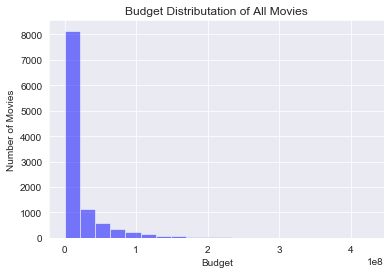

In [97]:
# get the budget distribution of all movies
budget = df.budget_adj
budget.hist(alpha=0.5, bins=20, color='blue', label='budget')
plt.ylabel('Number of Movies')
plt.xlabel('Budget')
plt.title('Budget Distributation of All Movies')

In [77]:
# create a mask of popular movies
popular = df.vote_average>=6.6

In [75]:
# get the mean budget of popular movies
df.budget_adj[popular].mean()

19571502.22294914

In [76]:
# get the mean revenue of popular movies
df.revenue_adj[popular].mean()

86639138.61970766

In [78]:
# create a mask of not so popular movies
non_popular = df.vote_average<6.6

In [79]:
# get the mean budget of not so popular movies
df.budget_adj[non_popular].mean()

38338931.455952704

In [80]:
# get the mean revenue of not so popular movies
df.revenue_adj[non_popular].mean()

38338931.455952704

> Question 2: What is the budget distribution of popular and not so popular movies?

Text(0.5, 1.0, 'Budget Distributation Based on Popularity')

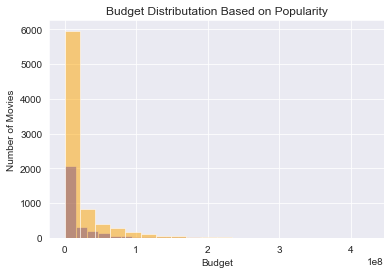

In [99]:
# compare the budget distribution of popular and not so popular movies
pop = df.budget_adj[popular]
pop.hist(alpha=0.5, bins=20, color='blue', label='popular')
non_pop = df.budget_adj[non_popular]
non_pop.hist(alpha=0.5, bins=20, color='orange', label='non_popular')
plt.legend=()
plt.ylabel('Number of Movies')
plt.xlabel('Budget')
plt.title('Budget Distributation Based on Popularity')

> Question 3: Compare the proportion of budget for popular and not so popular movies based on the mean budget of all movies

In [142]:
# get mean of the budget for all movies, for the popular movies and for the not so popular movies
budget_mean = df.budget_adj.mean()
budget_mean
pop_mean = df.budget_adj[popular].mean()
pop_mean
non_pop_mean = df.budget_adj[non_popular].mean()
pop_mean

19571502.22294914

Text(0.5, 0, 'proportion_pop + proportion_non_pop')

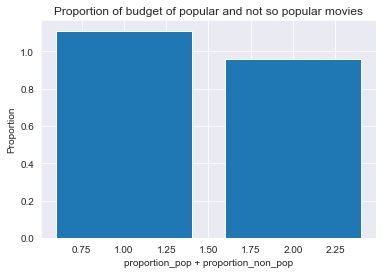

In [154]:
# get and compare the proportion of budget for popular and not so popular movies based on the mean budget of all movies
proportion_pop = pop_mean/budget_mean
proportion_non_pop = non_pop_mean/budget_mean

height=[proportion_pop, proportion_non_pop]
plt.bar(locations, height);
plt.title('Proportion of budget of popular and not so popular movies')
plt.ylabel('Proportion');
plt.xlabel('proportion_pop + proportion_non_pop')



Question 4: What is the distribution of the revenue of popular movies?

Text(0.5, 0, 'Revenue')

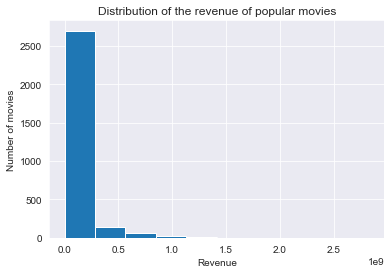

In [156]:
# get the distribution of the revenue of popular movies
df.revenue_adj[popular].hist()
plt.title('Distribution of the revenue of popular movies')
plt.ylabel('Number of movies');
plt.xlabel('Revenue')

Question 5: What is the distribution of the budget and revenue of popular movies?

Text(0.5, 0, 'budget and revenue')

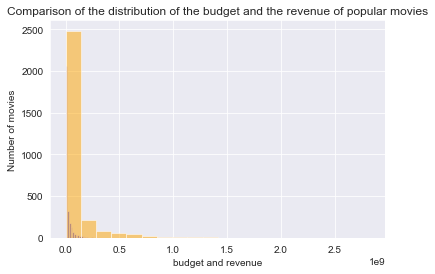

In [171]:
#get the comparison of the distribution of the budget and revenue of popular movies
df.budget_adj[popular].hist(alpha = 0.5, bins = 20, color='blue')
df.revenue_adj[popular].hist(alpha = 0.5, bins = 20, color='orange')
plt.title('Comparison of the distribution of the budget and the revenue of popular movies')
plt.ylabel('Number of movies');
plt.xlabel('budget and revenue')

### Research Area 3: Release year of movies
> Question 1: When were the most popular movies produced?

Text(0.5, 0, 'Release year')

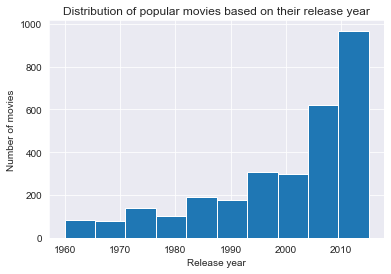

In [167]:
df.release_year[popular].hist()
plt.title('Distribution of popular movies based on their release year')
plt.ylabel('Number of movies')
plt.xlabel('Release year')

> However, the explanation of the distribution can be that more movies were produced after 2000.

> Question 2: What was the vote average for movies before 2000 and after 2000?

Text(0.5, 0, 'Vote average')

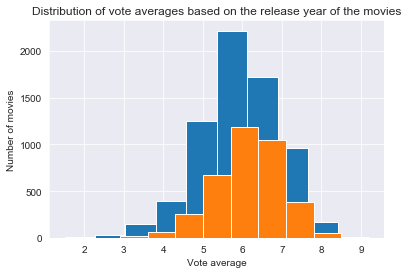

In [165]:
# get the distribution of vote averages based on the release year of the movies
After_year2000=df.query('release_year > 2000')['vote_average'].hist()
Before_year2000=df.query('release_year < 2000')['vote_average'].hist()
plt.title('Distribution of vote averages based on the release year of the movies')
plt.ylabel('Number of movies');
plt.xlabel('Vote average')

### Research Area 4: Vote average compared to budget and revenue
> Question 1: What is the budget and revenue distribution based on votes?

Text(0.5, 0, 'vote average')

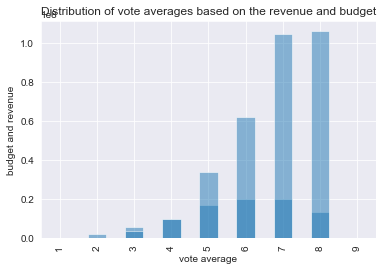

In [173]:
# get integers of votes for cleaner data
vote_avg = df.vote_average.astype(int)
vote_avg

# get the distribution
df.groupby(vote_avg).budget_adj.mean().plot(alpha=0.5, kind='bar')
df.groupby(vote_avg).revenue_adj.mean().plot(alpha=0.5, kind='bar')
plt.title('Distribution of vote averages based on the revenue and budget')
plt.ylabel('budget and revenue');
plt.xlabel('vote average')

Text(0.5, 0, 'vote average')

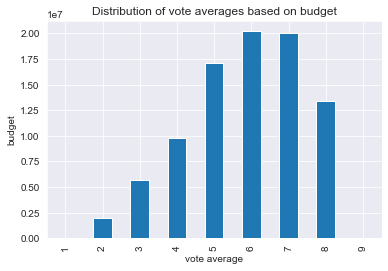

In [174]:
# get the distribution of votes based on budget
df.groupby(vote_avg).budget_adj.mean().plot(kind='bar')
plt.title('Distribution of vote averages based on budget')
plt.ylabel('budget');
plt.xlabel('vote average')

Text(0.5, 0, 'vote average')

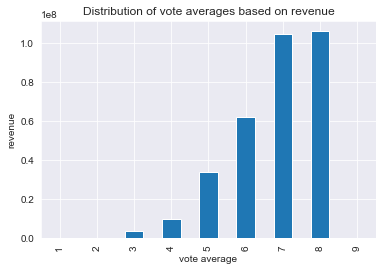

In [175]:
# get the distribution of votes based on revenue
df.groupby([vote_avg]).revenue_adj.mean().plot(kind='bar')
plt.title('Distribution of vote averages based on revenue')
plt.ylabel('revenue');
plt.xlabel('vote average')

<a id='conclusions'></a>
## Conclusions

> Two initial conclusions were straightforward from the general histogram:
> - The TMDB contains information mostly about movies from after the 2000s.
> - The distribution of vote averages of movies is a bit right skewed.

> Based on the investigation, more films were produced after 2000. The popular movies generated more revenue. The budget of the not so popular movies were not much lower than the popular movies. 

> Furher investigation can be executed based ob genres.